# Info
Name:  

    muSSTAR_spectro_test_data

Purpose:  

    Test out the data from different spectrometers to be used with musstar
  
Input:

    none
  
Output:

    figures
  
Keywords:

    none
  
Dependencies:

    - load_utils.py : for loading OMI HDF5 files
    - matplotlib
    - numpy
  
Needed Files:

  - file.rc : for consistent creation of look of matplotlib figures
  - ...
  
Modification History:

    Written: Samuel LeBlanc, Santa Cruz, CA, 2019-05-18
    Modified: Samuel LeBlanc, Santa Cruz, CA, 2020-04-01

# Prepare python environment

In [1]:
%config InlineBackend.rc = {}
import matplotlib 
import os
matplotlib.rc_file(os.path.join(os.getcwd(),'file.rc'))
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import numpy as np
import Sp_parameters as Sp
from load_utils import mat2py_time, toutc, load_ict
import load_utils as lu
import plotting_utils as pu
from path_utils import getpath
import hdf5storage as hs
from datetime import datetime
from scipy.interpolate import UnivariateSpline
import matplotlib.dates as mdates
from mpl_toolkits.basemap import Basemap
import scipy.stats as st

In [2]:
%matplotlib notebook

In [5]:
fp = getpath('musstar')

Return path named:  musstar /data/sam/muSSTAR/


In [6]:
import pandas as pd

# Load files for the Darks analysis of C11482

In [7]:
f = fp+'spectro_testdata/C11482GA_Data/'

In [33]:
fs = os.listdir(f)

In [49]:
d = []
s = []
for ff in fs:
    print ff
    dat = pd.read_csv(f+ff,header=21)
    d.append(dat)
    try:
        sp = np.array([dat['{}'.format(i+1)][1:] for i in xrange(len(dat.keys())-4)])
    except:
        sp = np.array([np.nan, np.nan])
    
    s.append(sp)
    

File1.csv
File2_HiGain_50msec.csv
File2_LoGain_50msec.csv
File2_LoGain_5msec.csv
File3_HiGain_50msec.csv
File3_LoGain_50msec.csv
File3_LoGain_5msec.csv
File4_HiGain_50msec.csv
File4_LoGain_50msec.csv
File4_LoGain_5msec.csv
File_HiGain_50msec.csv
File_LoGain_50msec.csv
File_LoGain_5msec.csv


In [51]:
s

[array([[2237., 2352., 2200., ..., 2344., 2171., 2339.],
        [2284., 2302., 2248., ..., 2312., 2232., 2315.],
        [2297., 2303., 2264., ..., 2313., 2234., 2326.],
        ...,
        [2292., 2300., 2269., ..., 2306., 2222., 2315.],
        [2301., 2311., 2252., ..., 2309., 2236., 2327.],
        [2298., 2305., 2252., ..., 2320., 2242., 2323.]]),
 array([[6694., 4848., 3086., ..., 2668., 3030., 5661.],
        [6704., 4841., 3078., ..., 2669., 3039., 5686.],
        [6727., 4846., 3127., ..., 2671., 3027., 5635.],
        ...,
        [6726., 4830., 3102., ..., 2639., 3052., 5691.],
        [6792., 4888., 3141., ..., 2681., 3083., 5751.],
        [6739., 4919., 3129., ..., 2662., 3029., 5702.]]),
 array([nan, nan]),
 array([[2313., 2322., 2267., ..., 2315., 2229., 2334.],
        [2304., 2317., 2267., ..., 2319., 2246., 2342.],
        [2316., 2331., 2274., ..., 2323., 2237., 2347.],
        ...,
        [2312., 2325., 2268., ..., 2333., 2232., 2332.],
        [2311., 2339., 22

In [38]:
dat.keys()

Index([u'Pixel', u'WaveLength', u'dark', u'ref', u'1', u'2', u'3', u'4', u'5',
       u'6',
       ...
       u'711', u'712', u'713', u'714', u'715', u'716', u'717', u'718', u'719',
       u'720'],
      dtype='object', length=724)

In [18]:
dat = pd.read_csv(f+'File_HiGain_50msec.csv',header=21)

In [19]:
dat

,Pixel,WaveLength,dark,ref,1,2,3,4,5,6,...,4991,4992,4993,4994,4995,4996,4997,4998,4999,5000
0,Time,NaN,NaN,NaN,81.0,60.0,60.0,60.0,60.0,60.0,...,60.0,60.0,60.0,60.0,60.0,60.0,60.0,60.0,60.0,60.0
1,1,882.516933,0.0,0.0,4389.0,4481.0,4478.0,4465.0,4474.0,4473.0,...,5519.0,5483.0,5501.0,5490.0,5496.0,5517.0,5500.0,5501.0,5485.0,5486.0
2,2,884.457235,0.0,0.0,3628.0,3601.0,3570.0,3581.0,3580.0,3597.0,...,4129.0,4174.0,4134.0,4133.0,4152.0,4151.0,4160.0,4228.0,4164.0,4166.0
3,3,886.395288,0.0,0.0,2615.0,2692.0,2680.0,2682.0,2685.0,2694.0,...,2849.0,2856.0,2867.0,2854.0,2855.0,2842.0,2842.0,2877.0,2866.0,2846.0
4,4,888.331112,0.0,0.0,3787.0,3767.0,3811.0,3769.0,3763.0,3777.0,...,4422.0,4409.0,4460.0,4445.0,4443.0,4399.0,4436.0,4455.0,4467.0,4439.0
5,5,890.264726,0.0,0.0,2365.0,2467.0,2469.0,2433.0,2463.0,2454.0,...,2527.0,2527.0,2528.0,2501.0,2505.0,2525.0,2544.0,2551.0,2542.0,2515.0
6,6,892.196150,0.0,0.0,3700.0,3670.0,3646.0,3663.0,3685.0,3694.0,...,4320.0,4302.0,4322.0,4332.0,4343.0,4284.0,4332.0,4308.0,4332.0,4346.0
7,7,894.125402,0.0,0.0,2600.0,2660.0,2647.0,2667.0,2653.0,2684.0,...,2793.0,2803.0,2831.0,2829.0,2818.0,2799.0,2808.0,2831.0,2829.0,2832.0
8,8,896.052502,0.0,0.0,3852.0,3821.0,3831.0,3847.0,3811.0,3806.0,...,4502.0,4493.0,4496.0,4500.0,4544.0,4479.0,4494.0,4512.0,4517.0,4510.0
9,9,897.977469,0.0,0.0,2572.0,2576.0,2594.0,2605.0,2561.0,2602.0,...,2745.0,2731.0,2744.0,2745.0,2737.0,2716.0,2718.0,2714.0,2747.0,2719.0


## Plot out the darks

<IPython.core.display.Javascript object>


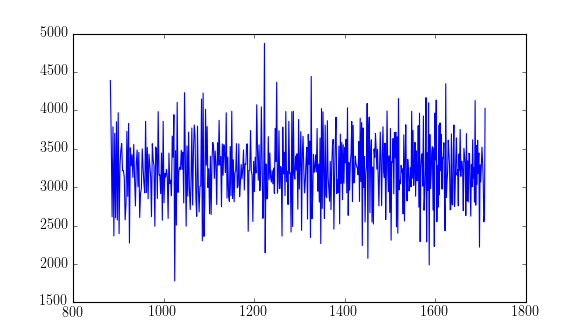

In [24]:
plt.figure()
plt.plot(dat['WaveLength'][1:],dat['1'][1:])

In [26]:
sp = np.array([dat['{}'.format(i+1)][1:] for i in xrange(5000)])

In [29]:
dat['WaveLength'][200]

1239.93003662672

In [58]:
ff.replace('_','\_')

u'File\\_LoGain\\_5msec.csv'

<IPython.core.display.Javascript object>


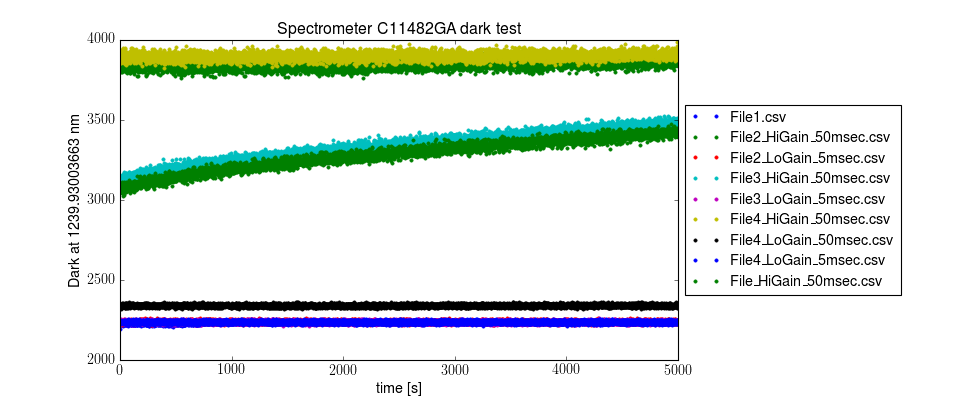

In [73]:
w = 200
plt.figure(figsize=(12,5))
for i,ss in enumerate(s):
    try:
        plt.plot(ss[:,w],'.',label=fs[i].replace('_','\_'))
    except:
        pass
plt.xlabel('time [s]')
plt.ylabel('Dark at {} nm'.format(dat['WaveLength'][w]))
plt.title('Spectrometer C11482GA dark test')
box = plt.gca().get_position()
plt.gca().set_position([box.x0, box.y0, box.width * 0.75, box.height])
plt.legend(loc='center left',bbox_to_anchor=(1, 0.5))
plt.savefig(f+'Darks_1240nm.png',dpi=600,transparent=True)

<IPython.core.display.Javascript object>


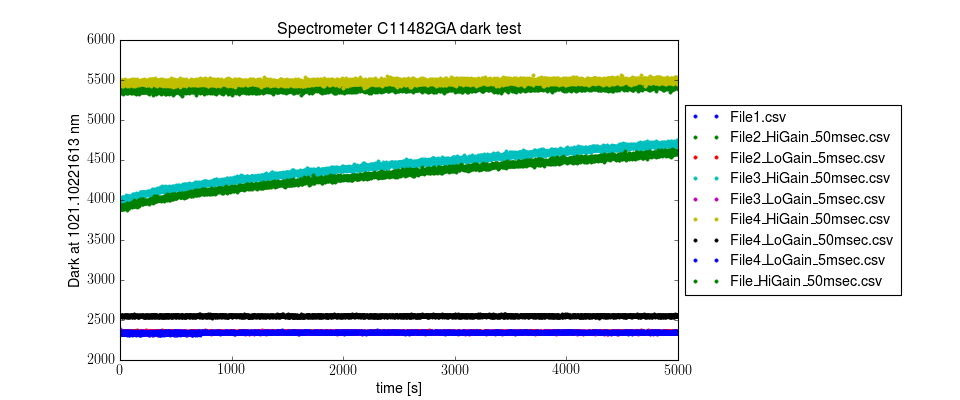

In [77]:
w = 75
plt.figure(figsize=(12,5))
for i,ss in enumerate(s):
    try:
        plt.plot(ss[:,w],'.',label=fs[i].replace('_','\_'))
    except:
        pass
plt.xlabel('time [s]')
plt.ylabel('Dark at {} nm'.format(dat['WaveLength'][w]))
plt.title('Spectrometer C11482GA dark test')
box = plt.gca().get_position()
plt.gca().set_position([box.x0, box.y0, box.width * 0.75, box.height])
plt.legend(loc='center left',bbox_to_anchor=(1, 0.5))
plt.savefig(f+'Darks_1020nm.png',dpi=600,transparent=True)

<IPython.core.display.Javascript object>


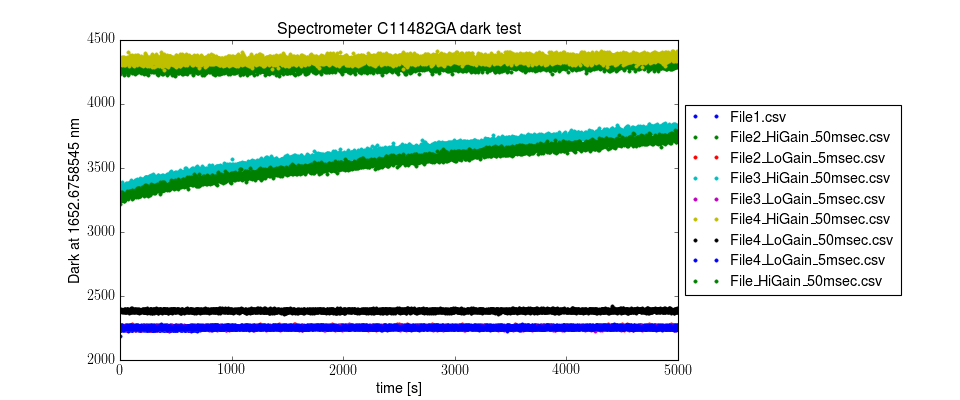

In [80]:
w = 470
plt.figure(figsize=(12,5))
for i,ss in enumerate(s):
    try:
        plt.plot(ss[:,w],'.',label=fs[i].replace('_','\_'))
    except:
        pass
plt.xlabel('time [s]')
plt.ylabel('Dark at {} nm'.format(dat['WaveLength'][w]))
plt.title('Spectrometer C11482GA dark test')
box = plt.gca().get_position()
plt.gca().set_position([box.x0, box.y0, box.width * 0.75, box.height])
plt.legend(loc='center left',bbox_to_anchor=(1, 0.5))
plt.savefig(f+'Darks_1650nm.png',dpi=600,transparent=True)

In [107]:
fs

[u'File1.csv',
 u'File2_HiGain_50msec.csv',
 u'File2_LoGain_50msec.csv',
 u'File2_LoGain_5msec.csv',
 u'File3_HiGain_50msec.csv',
 u'File3_LoGain_50msec.csv',
 u'File3_LoGain_5msec.csv',
 u'File4_HiGain_50msec.csv',
 u'File4_LoGain_50msec.csv',
 u'File4_LoGain_5msec.csv',
 u'File_HiGain_50msec.csv',
 u'File_LoGain_50msec.csv',
 u'File_LoGain_5msec.csv']

# Load files for the direct beam Hammamatsu data

In [81]:
fd = fp+'spectro_testdata/Hamamatsu_Data/'

In [82]:
ffd = os.listdir(fd)

In [83]:
ffd

[u'HamaSpec_Gershun.csv',
 u'HamaSpec_Gershun_HG_1000.csv',
 u'HamaSpec_Gershun_HG_3000.csv',
 u'HamaSpec_Gershun_LG_10000.csv',
 u'HamaSpec_Gershun_LG_50000.csv',
 u'HamaSpec_Gershun_LG_50000_300.csv']

In [84]:
dd = []
sd = []
for ff in ffd:
    print ff
    dat = pd.read_csv(fd+ff,header=21)
    dd.append(dat)
    try:
        sp = np.array([dat['{}'.format(i+1)][1:] for i in xrange(len(dat.keys())-4)])
    except:
        sp = np.array([np.nan, np.nan])
    
    sd.append(sp)
    

HamaSpec_Gershun.csv
HamaSpec_Gershun_HG_1000.csv
HamaSpec_Gershun_HG_3000.csv
HamaSpec_Gershun_LG_10000.csv
HamaSpec_Gershun_LG_50000.csv
HamaSpec_Gershun_LG_50000_300.csv


## Plot the spectra

<IPython.core.display.Javascript object>


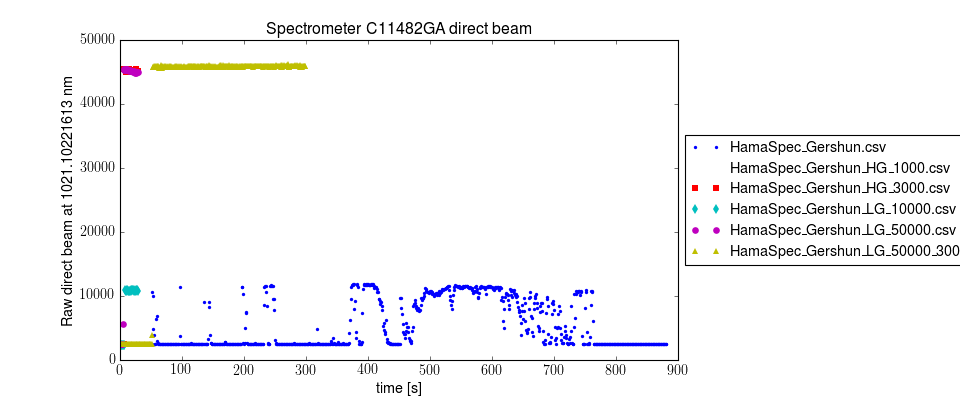

In [166]:
w = 75
plt.figure(figsize=(12,5))
mk = '.xsdo^+'
for i,ss in enumerate(sd):
    try:
        plt.plot(ss[:,w],mk[i],label=ffd[i].replace('_','\_'),markeredgecolor='None')
    except:
        pass
plt.xlabel('time [s]')
plt.ylabel('Raw direct beam at {} nm'.format(dat['WaveLength'][w]))
plt.title('Spectrometer C11482GA direct beam')
box = plt.gca().get_position()
plt.gca().set_position([box.x0, box.y0, box.width * 0.75, box.height])
plt.legend(loc='center left',bbox_to_anchor=(1, 0.5))
plt.savefig(fd+'Direct_beam_1020nm.png',dpi=600,transparent=True)

In [108]:
s[7]

array([[6847., 4945., 3103., ..., 2692., 3051., 5778.],
       [6838., 4912., 3132., ..., 2665., 3089., 5749.],
       [6852., 4960., 3120., ..., 2655., 3065., 5743.],
       ...,
       [6891., 4938., 3118., ..., 2651., 3052., 5800.],
       [6891., 4971., 3129., ..., 2657., 3089., 5802.],
       [6896., 4925., 3125., ..., 2657., 3085., 5790.]])

In [109]:
np.nanstd(s[7],axis=0).shape

(512,)

<IPython.core.display.Javascript object>


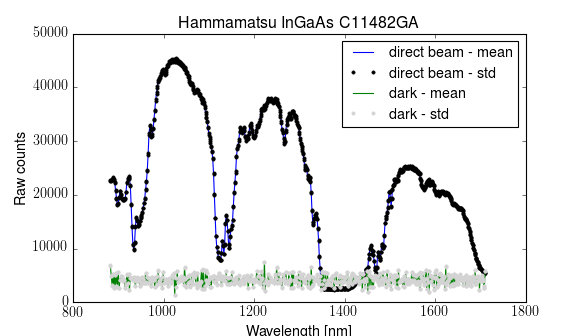

In [115]:
plt.figure()
plt.plot(dat['WaveLength'][1:],np.nanmean(sd[4][6:,:],axis=0),'-',label='direct beam - mean')
plt.plot(dat['WaveLength'][1:],np.nanmean(sd[4][6:,:],axis=0)+np.nanstd(sd[4][6:,:],axis=0),'.k',label='direct beam - std')
plt.plot(dat['WaveLength'][1:],np.nanmean(sd[4][6:,:],axis=0)-np.nanstd(sd[4][6:,:],axis=0),'.k')
plt.plot(dat['WaveLength'][1:],np.nanmean(s[7],axis=0),'-',label='dark - mean')
plt.plot(dat['WaveLength'][1:],np.nanmean(s[7],axis=0)+np.nanstd(s[7],axis=0),'.',color='lightgrey',label='dark - std')
plt.plot(dat['WaveLength'][1:],np.nanmean(s[7],axis=0)-np.nanstd(s[7],axis=0),'.',color='lightgrey')
plt.legend()
plt.xlabel('Wavelength [nm]')
plt.ylabel('Raw counts')
plt.title('Hammamatsu InGaAs C11482GA')
plt.savefig(fd+'raw_spectra_dir_darks.png',dpi=600,transparent=True)

<IPython.core.display.Javascript object>


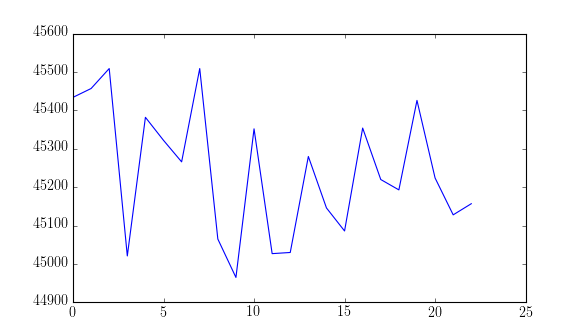

In [158]:
plt.figure()
plt.plot(sd[2][7:,75])

<IPython.core.display.Javascript object>


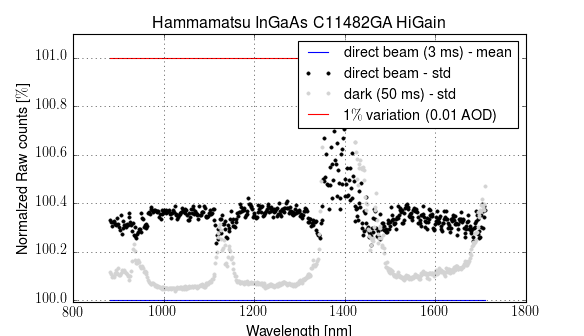

In [164]:
plt.figure()
nm = np.nanmean(sd[2][7:,:],axis=0)
plt.plot(dat['WaveLength'][1:],np.nanmean(sd[2][7:,:],axis=0)/nm*100.0,'-',label='direct beam (3 ms) - mean')
plt.plot(dat['WaveLength'][1:],(np.nanmean(sd[2][7:,:],axis=0)+np.nanstd(sd[2][7:,:],axis=0))/nm*100.0,'.k',label='direct beam - std')
plt.plot(dat['WaveLength'][1:],(np.nanmean(sd[2][7:,:],axis=0)-np.nanstd(sd[2][7:,:],axis=0))/nm*100.0,'.k')
#plt.plot(dat['WaveLength'][1:],np.nanmean(s[7],axis=0),'-',label='dark - mean')
plt.plot(dat['WaveLength'][1:],(nm+np.nanstd(s[7],axis=0))/nm*100.0,'.',color='lightgrey',label='dark (50 ms) - std')
plt.plot(dat['WaveLength'][1:],(nm-np.nanstd(s[7],axis=0))/nm*100.0,'.',color='lightgrey')
plt.plot(dat['WaveLength'][1:],nm*101.0/nm,'-',color='red',label='1$\%$ variation (0.01 AOD)')
plt.plot(dat['WaveLength'][1:],nm*99.0/nm,'-',color='red')
plt.ylim(99.99,101.1)
plt.grid()
plt.legend()
plt.xlabel('Wavelength [nm]')
plt.ylabel('Normalzed Raw counts [$\\%$]')
plt.title('Hammamatsu InGaAs C11482GA HiGain')
plt.savefig(fd+'raw_spectra_dir_darks_nomralized_hi50.png',dpi=600,transparent=True)

<IPython.core.display.Javascript object>


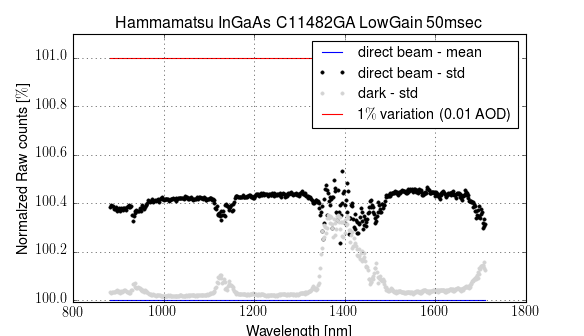

In [165]:
plt.figure()
nm = np.nanmean(sd[4][6:,:],axis=0)
plt.plot(dat['WaveLength'][1:],np.nanmean(sd[4][6:,:],axis=0)/nm*100.0,'-',label='direct beam - mean')
plt.plot(dat['WaveLength'][1:],(np.nanmean(sd[4][6:,:],axis=0)+np.nanstd(sd[4][6:,:],axis=0))/nm*100.0,'.k',label='direct beam - std')
plt.plot(dat['WaveLength'][1:],(np.nanmean(sd[4][6:,:],axis=0)-np.nanstd(sd[4][6:,:],axis=0))/nm*100.0,'.k')
#plt.plot(dat['WaveLength'][1:],np.nanmean(s[7],axis=0),'-',label='dark - mean')
plt.plot(dat['WaveLength'][1:],(nm++np.nanstd(s[8],axis=0))/nm*100.0,'.',color='lightgrey',label='dark - std')
plt.plot(dat['WaveLength'][1:],(nm-np.nanstd(s[8],axis=0))/nm*100.0,'.',color='lightgrey')
plt.plot(dat['WaveLength'][1:],nm*101.0/nm,'-',color='red',label='1$\%$ variation (0.01 AOD)')
plt.plot(dat['WaveLength'][1:],nm*99.0/nm,'-',color='red')
plt.ylim(99.99,101.1)
plt.grid()
plt.legend()
plt.xlabel('Wavelength [nm]')
plt.ylabel('Normalzed Raw counts [$\\%$]')
plt.title('Hammamatsu InGaAs C11482GA LowGain 50msec')
plt.savefig(fd+'raw_spectra_dir_darks_nomralized_lo50.png',dpi=600,transparent=True)

In [153]:
fs[7]

u'File4_HiGain_50msec.csv'

In [126]:
ffd[4]

u'HamaSpec_Gershun_LG_50000.csv'

In [127]:
ffd[2]

u'HamaSpec_Gershun_HG_3000.csv'

In [147]:
fs[8]

u'File4_LoGain_50msec.csv'

# Load the files for analysis of C11486

In [10]:
fu = fp+'spectro_testdata/C11486GA/'

In [11]:
fsu = os.listdir(fu)

In [12]:
fsu

[u'Sensitivity_Test_20200304.xlsx', u'IRSpecL2.xlsx', u'IRSpecH.xlsx']

In [ ]:
pd.read_excel()

In [18]:
du = []
for u in fsu:
    ddu = pd.read_excel(fu+u,header=22)
    du.append(ddu)

In [23]:
du[2].drop(0)

,Pixel,WaveLength,dark,ref,1,2,3,4,5,6,...,191,192,193,194,195,196,197,198,199,200
1,1,888.777789,0.0,0.0,4420,4431,4427,4420,4430,4463,...,4933,4945,4956,4939,4943,4955,4930,4947,4949,4931
2,2,892.502251,0.0,0.0,4278,4297,4290,4267,4267,4318,...,4808,4800,4794,4797,4804,4803,4792,4812,4802,4795
3,3,896.222419,0.0,0.0,4211,4226,4212,4197,4217,4244,...,4749,4737,4750,4741,4745,4758,4740,4753,4771,4743
4,4,899.938333,0.0,0.0,4370,4393,4388,4375,4354,4416,...,4905,4914,4911,4908,4909,4906,4906,4913,4909,4899
5,5,903.650031,0.0,0.0,4553,4550,4536,4560,4539,4576,...,5073,5085,5068,5083,5089,5088,5079,5081,5093,5079
6,6,907.357550,0.0,0.0,4446,4462,4437,4445,4451,4492,...,4999,4989,5000,4987,4983,4982,4987,5004,5000,4993
7,7,911.060925,0.0,0.0,4071,4065,4060,4071,4088,4108,...,4600,4591,4599,4582,4594,4619,4621,4598,4603,4610
8,8,914.760193,0.0,0.0,4447,4460,4449,4439,4454,4478,...,4994,4957,4975,4965,4967,5006,4981,4976,4988,4980
9,9,918.455386,0.0,0.0,4401,4400,4373,4390,4380,4422,...,4917,4911,4921,4916,4916,4913,4912,4911,4924,4920
10,10,922.146538,0.0,0.0,4439,4449,4436,4420,4429,4460,...,4964,4954,4958,4972,4948,4975,4956,4948,4963,4955


In [24]:
du[1]['WaveLength']

0              NaN
1       888.777789
2       892.502251
3       896.222419
4       899.938333
5       903.650031
6       907.357550
7       911.060925
8       914.760193
9       918.455386
10      922.146538
11      925.833681
12      929.516844
13      933.196058
14      936.871351
15      940.542752
16      944.210286
17      947.873980
18      951.533858
19      955.189943
20      958.842260
21      962.490829
22      966.135671
23      969.776806
24      973.414254
25      977.048032
26      980.678158
27      984.304648
28      987.927518
29      991.546781
          ...     
227    1626.231080
228    1628.952860
229    1631.670303
230    1634.383455
231    1637.092366
232    1639.797085
233    1642.497661
234    1645.194147
235    1647.886595
236    1650.575061
237    1653.259598
238    1655.940265
239    1658.617118
240    1661.290218
241    1663.959624
242    1666.625399
243    1669.287605
244    1671.946308
245    1674.601573
246    1677.253467
247    1679.902059
248    1682.

In [35]:
len(du[1].keys())

204

In [40]:
sp = np.stack([du[1][i].drop(0) for i in range(1,len(du[1].keys())-4)])

In [41]:
sp.shape

(199, 256)

In [43]:
wvl = du[1]['WaveLength'].drop(0).to_numpy()

In [55]:
sp1 = np.stack([du[2][i].drop(0) for i in range(1,len(du[2].keys())-4)])

In [56]:
wvl1 = du[2]['WaveLength'].drop(0).to_numpy()

## Plot out some spectra

In [48]:
from mpltools import color

<IPython.core.display.Javascript object>


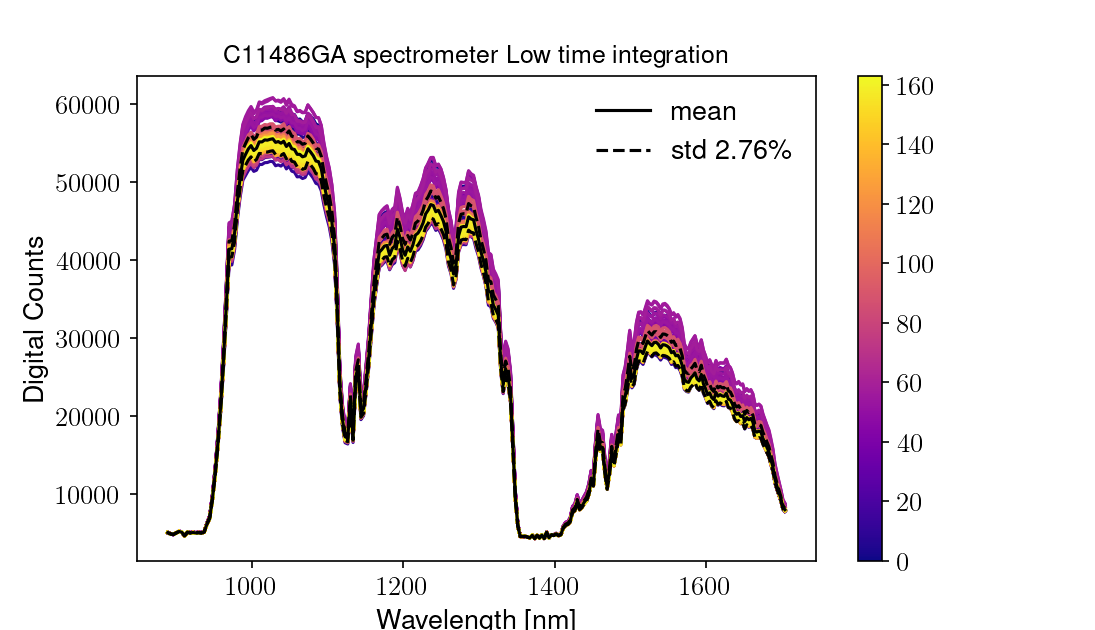

Text(0.5,1,'C11486GA spectrometer Low time integration')

In [75]:
plt.figure()
cmap = 'plasma'
color.cycle_cmap(length=len(sp[35:,0])+1,cmap=cmap,ax=plt.gca())
plt.plot(wvl,sp.T[:,35:])
plt.ylabel('Digital Counts')
plt.xlabel('Wavelength [nm]')
scalarmap = plt.cm.ScalarMappable(cmap=plt.cm.get_cmap(cmap))
scalarmap.set_array(range(len(sp[35:,0])))
plt.colorbar(scalarmap)
plt.plot(wvl1,np.nanmean(sp.T[:,35:],axis=1),'-k',label='mean')
plt.plot(wvl1,np.nanmean(sp.T[:,35:],axis=1)-np.nanstd(sp.T[:,35:],axis=1),'--k',
         label='std {:2.2f}\%'.format(np.nanstd(sp.T[:,35:],axis=1)[i1020]/np.nanmean(sp.T[:,35:],axis=1)[i1020]*100.0))
plt.plot(wvl1,np.nanmean(sp.T[:,35:],axis=1)+np.nanstd(sp.T[:,35:],axis=1),'--k')
plt.legend(frameon=False)
plt.title('C11486GA spectrometer Low time integration')

In [52]:
i1020 = np.argmin(abs(wvl-1020.0))
i1240 = np.argmin(abs(wvl-1240.0))
i1630 = np.argmin(abs(wvl-1630.0))

<IPython.core.display.Javascript object>


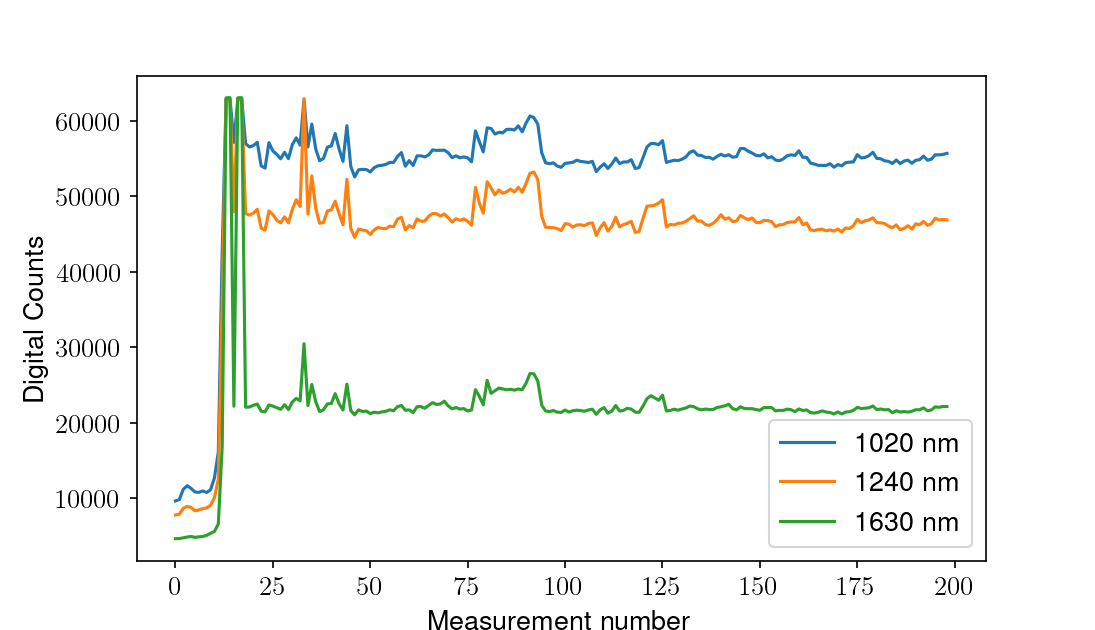

Text(0.5,0,'Measurement number')

In [60]:
plt.figure()
plt.plot(sp[:,i1020],label='1020 nm')
plt.plot(sp[:,i1240],label='1240 nm')
plt.plot(sp[:,i1630],label='1630 nm')
plt.legend()
plt.ylabel('Digital Counts')
plt.xlabel('Measurement number')

<IPython.core.display.Javascript object>


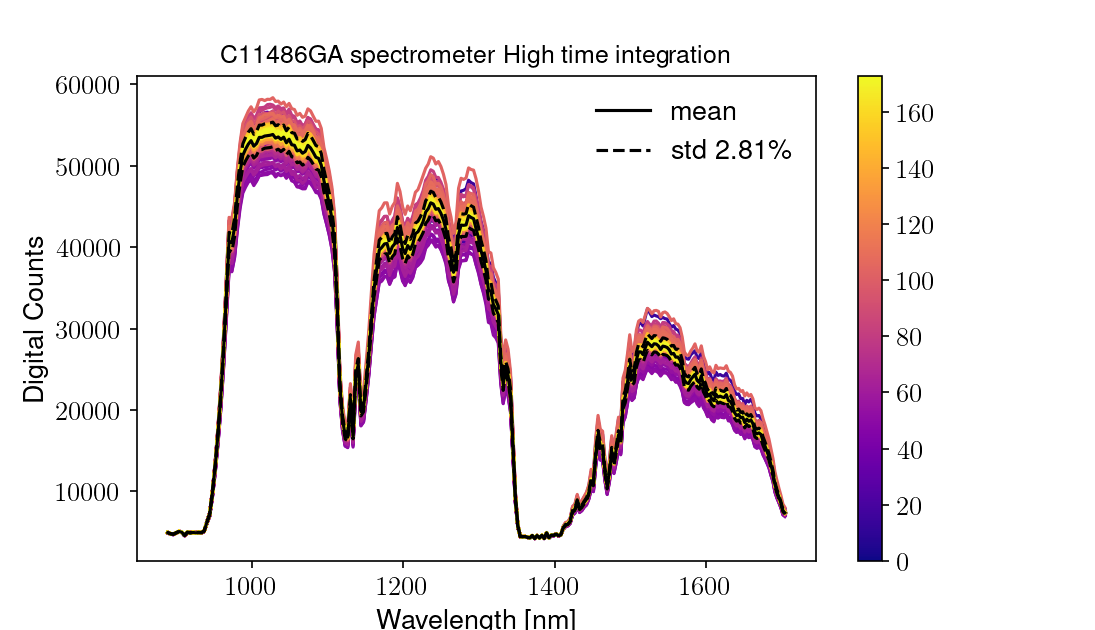

Text(0.5,1,'C11486GA spectrometer High time integration')

In [74]:
plt.figure()
cmap = 'plasma'
color.cycle_cmap(length=len(sp1[25:,0])+1,cmap=cmap,ax=plt.gca())
plt.plot(wvl1,sp1.T[:,25:])
plt.ylabel('Digital Counts')
plt.xlabel('Wavelength [nm]')
scalarmap = plt.cm.ScalarMappable(cmap=plt.cm.get_cmap(cmap))
scalarmap.set_array(range(len(sp1[25:,0])))
plt.colorbar(scalarmap)
plt.plot(wvl1,np.nanmean(sp1.T[:,25:],axis=1),'-k',label='mean')
plt.plot(wvl1,np.nanmean(sp1.T[:,25:],axis=1)-np.nanstd(sp1.T[:,25:],axis=1),'--k',
         label='std {:2.2f}\%'.format(np.nanstd(sp1.T[:,25:],axis=1)[i1020]/np.nanmean(sp1.T[:,25:],axis=1)[i1020]*100.0))
plt.plot(wvl1,np.nanmean(sp1.T[:,25:],axis=1)+np.nanstd(sp1.T[:,25:],axis=1),'--k')
plt.legend(frameon=False)
plt.title('C11486GA spectrometer High time integration')

<IPython.core.display.Javascript object>


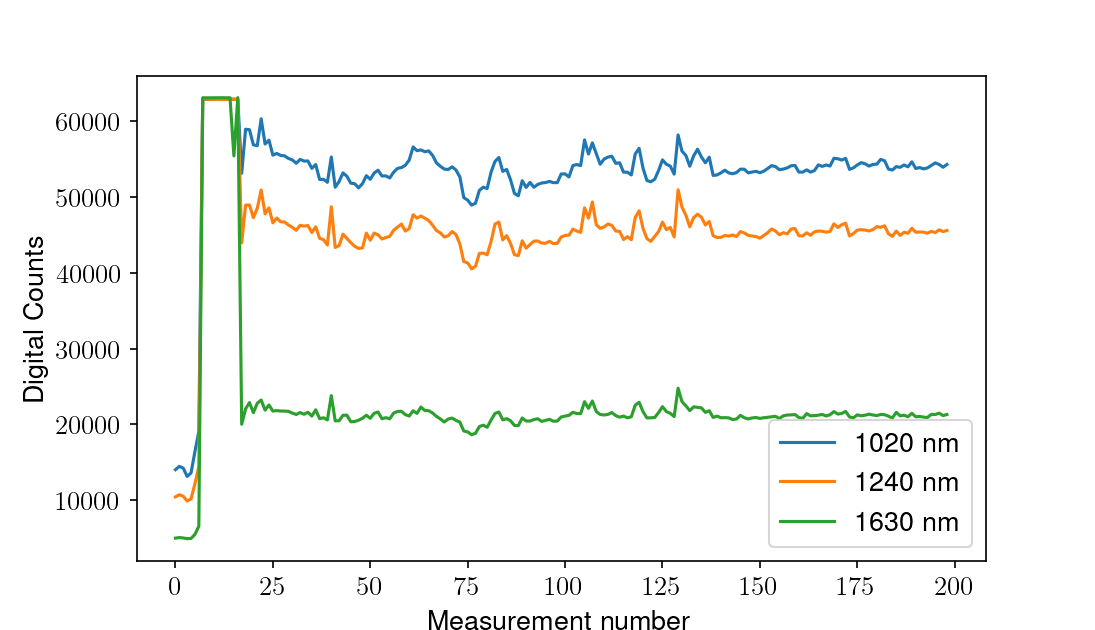

Text(0.5,0,'Measurement number')

In [58]:
plt.figure()
plt.plot(sp1[:,i1020],label='1020 nm')
plt.plot(sp1[:,i1240],label='1240 nm')
plt.plot(sp1[:,i1630],label='1630 nm')
plt.legend()
plt.ylabel('Digital Counts')
plt.xlabel('Measurement number')